In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/life-style-data/Final_data.csv
/kaggle/input/life-style-data/meal_metadata.csv


## Lifestyle Data Analysis

## Description:
The Lifestyle Data Analysis project focuses on exploring and understanding various aspects of individuals’ daily habits, behaviors, and choices that influence their overall well-being. The dataset typically includes information such as age, gender, occupation, diet, physical activity, sleep patterns, smoking and drinking habits, and health indicators.

By analyzing this data, we can identify patterns and correlations between lifestyle factors and health outcomes, discover trends across demographic groups, and build predictive models to assess wellness risks. This analysis supports data-driven recommendations for improving quality of life and promoting healthier living through personalized insights.

## Import dataset

In [2]:
df = pd.read_csv("/kaggle/input/life-style-data/Final_data.csv")

In [3]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low


In [4]:
df.tail()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
19995,46.77,Female,98.31,1.90,199.20,148.18,63.72,0.77,761.61,Strength,...,1882.80,0.500000,0.954837,0.623413,0.743876,1865.39,71.269345,533.2558,7.924402e+19,Medium
19996,40.38,Female,88.12,1.87,196.18,134.18,54.04,1.97,2303.13,Strength,...,1205.47,0.496968,0.689060,0.563810,0.683964,173.87,65.049689,1310.6016,5.708474e+19,Low
19997,50.31,Male,46.20,1.67,163.34,157.92,61.65,1.36,1468.80,Strength,...,1947.79,0.500280,2.105844,0.946701,0.966818,-43.80,35.420708,957.9568,9.101285e+19,High
19998,52.36,Male,44.30,1.62,179.27,121.23,60.88,1.41,929.75,Yoga,...,1921.51,0.499940,2.190745,0.509756,0.676243,346.25,35.889260,928.4004,5.246436e+19,Low
19999,29.56,Male,58.63,1.61,198.07,121.74,72.05,1.20,861.84,Yoga,...,1754.55,0.501280,1.494968,0.394302,0.614631,804.16,44.303237,841.1040,8.742467e+19,High


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             20000 non-null  float64
 1   Gender                          20000 non-null  object 
 2   Weight (kg)                     20000 non-null  float64
 3   Height (m)                      20000 non-null  float64
 4   Max_BPM                         20000 non-null  float64
 5   Avg_BPM                         20000 non-null  float64
 6   Resting_BPM                     20000 non-null  float64
 7   Session_Duration (hours)        20000 non-null  float64
 8   Calories_Burned                 20000 non-null  float64
 9   Workout_Type                    20000 non-null  object 
 10  Fat_Percentage                  20000 non-null  float64
 11  Water_Intake (liters)           20000 non-null  float64
 12  Workout_Frequency (days/week)   

In [6]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),...,BMI_calc,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04
mean,38.851454,73.898832,1.723094,179.889702,143.704306,62.195813,1.259446,1280.109600,26.101313,2.627486,...,24.921651,1998.297076,0.499983,1.460142,0.699005,0.802305,744.308699,53.786384,866.352318,8.631802e+19
std,12.114580,21.173010,0.127033,11.510805,14.267688,7.289351,0.341336,502.228982,4.996160,0.604724,...,6.701144,440.848408,0.001455,0.518946,0.144880,0.096613,720.946619,12.498740,250.317069,3.197579e+19
min,18.000000,39.180000,1.490000,159.310000,119.070000,49.490000,0.490000,323.110000,11.333134,1.460000,...,12.037907,1105.570000,0.492434,0.516706,0.371344,0.599789,-1266.220000,30.946261,219.852800,2.491905e+16
25%,28.170000,58.160000,1.620000,170.057500,131.220000,55.960000,1.050000,910.800000,22.387807,2.170000,...,20.094975,1661.022500,0.499054,1.076294,0.583656,0.727676,261.432500,44.587037,714.098250,6.441978e+19
50%,39.865000,70.000000,1.710000,180.140000,142.990000,62.200000,1.270000,1231.450000,25.822504,2.610000,...,24.119097,1943.130000,0.499981,1.382260,0.686284,0.794834,691.190000,51.204908,868.721400,8.371578e+19
75%,49.630000,86.100000,1.800000,189.425000,156.060000,68.090000,1.460000,1553.112500,29.676026,3.120000,...,28.562620,2271.950000,0.500910,1.750495,0.798196,0.869211,1176.290000,61.939016,1012.532700,1.100442e+20
max,59.670000,130.770000,2.010000,199.640000,169.840000,74.500000,2.020000,2890.820000,35.000000,3.730000,...,50.229544,3699.540000,0.507889,3.916881,1.073939,1.047032,3075.580000,90.117371,1477.108800,1.756614e+20


In [7]:
df.isnull().sum()

Age                               0
Gender                            0
Weight (kg)                       0
Height (m)                        0
Max_BPM                           0
Avg_BPM                           0
Resting_BPM                       0
Session_Duration (hours)          0
Calories_Burned                   0
Workout_Type                      0
Fat_Percentage                    0
Water_Intake (liters)             0
Workout_Frequency (days/week)     0
Experience_Level                  0
BMI                               0
Daily meals frequency             0
Physical exercise                 0
Carbs                             0
Proteins                          0
Fats                              0
Calories                          0
meal_name                         0
meal_type                         0
diet_type                         0
sugar_g                           0
sodium_mg                         0
cholesterol_mg                    0
serving_size_g              

In [8]:
df.duplicated().sum()

0

In [9]:
df.dtypes

Age                               float64
Gender                             object
Weight (kg)                       float64
Height (m)                        float64
Max_BPM                           float64
Avg_BPM                           float64
Resting_BPM                       float64
Session_Duration (hours)          float64
Calories_Burned                   float64
Workout_Type                       object
Fat_Percentage                    float64
Water_Intake (liters)             float64
Workout_Frequency (days/week)     float64
Experience_Level                  float64
BMI                               float64
Daily meals frequency             float64
Physical exercise                 float64
Carbs                             float64
Proteins                          float64
Fats                              float64
Calories                          float64
meal_name                          object
meal_type                          object
diet_type                         

In [10]:
df.shape

(20000, 54)

In [11]:
df.describe().loc[['mean','max','min']]

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),...,BMI_calc,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc
mean,38.851454,73.898832,1.723094,179.889702,143.704306,62.195813,1.259446,1280.1096,26.101313,2.627486,...,24.921651,1998.297076,0.499983,1.460142,0.699005,0.802305,744.308699,53.786384,866.352318,8.631802e+19
max,59.670000,130.770000,2.010000,199.640000,169.840000,74.500000,2.020000,2890.8200,35.000000,3.730000,...,50.229544,3699.540000,0.507889,3.916881,1.073939,1.047032,3075.580000,90.117371,1477.108800,1.756614e+20
min,18.000000,39.180000,1.490000,159.310000,119.070000,49.490000,0.490000,323.1100,11.333134,1.460000,...,12.037907,1105.570000,0.492434,0.516706,0.371344,0.599789,-1266.220000,30.946261,219.852800,2.491905e+16


In [12]:
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins',
       'Fats', 'Calories', 'meal_name', 'meal_type', 'diet_type', 'sugar_g',
       'sodium_mg', 'cholesterol_mg', 'serving_size_g', 'cooking_method',
       'prep_time_min', 'cook_time_min', 'rating', 'Name of Exercise', 'Sets',
       'Reps', 'Benefit', 'Burns Calories (per 30 min)', 'Target Muscle Group',
       'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle',
       'Workout', 'BMI_calc', 'cal_from_macros', 'pct_carbs', 'protein_per_kg',
       'pct_HRR', 'pct_maxHR', 'cal_balance', 'lean_mass_kg', 'expected_burn',
       'Burns Calories (per 30 min)_bc', 'Burns_Calories_Bin'],
      dtype='object')

## Data visualizations

In [13]:
from math import pi

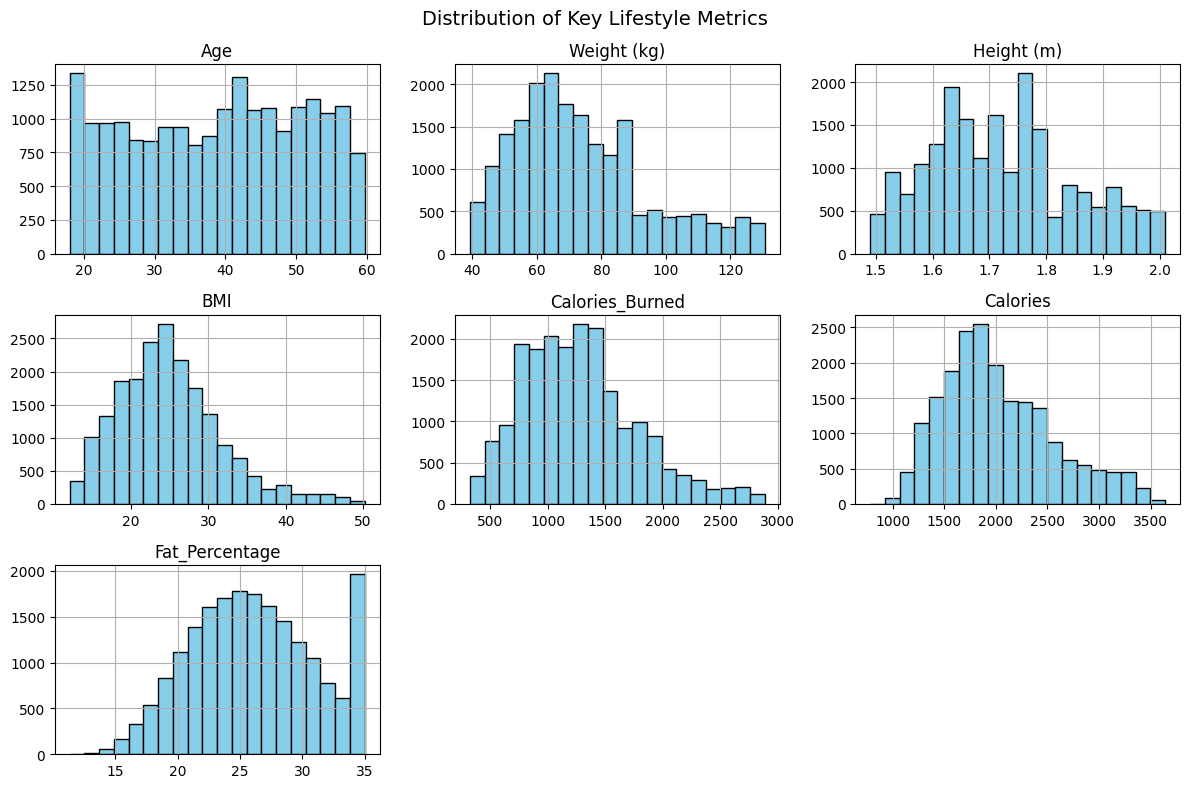

In [14]:
num_features = ['Age', 'Weight (kg)', 'Height (m)', 'BMI', 
                'Calories_Burned', 'Calories', 'Fat_Percentage']
df[num_features].hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Key Lifestyle Metrics', fontsize=14)
plt.tight_layout()
plt.show()

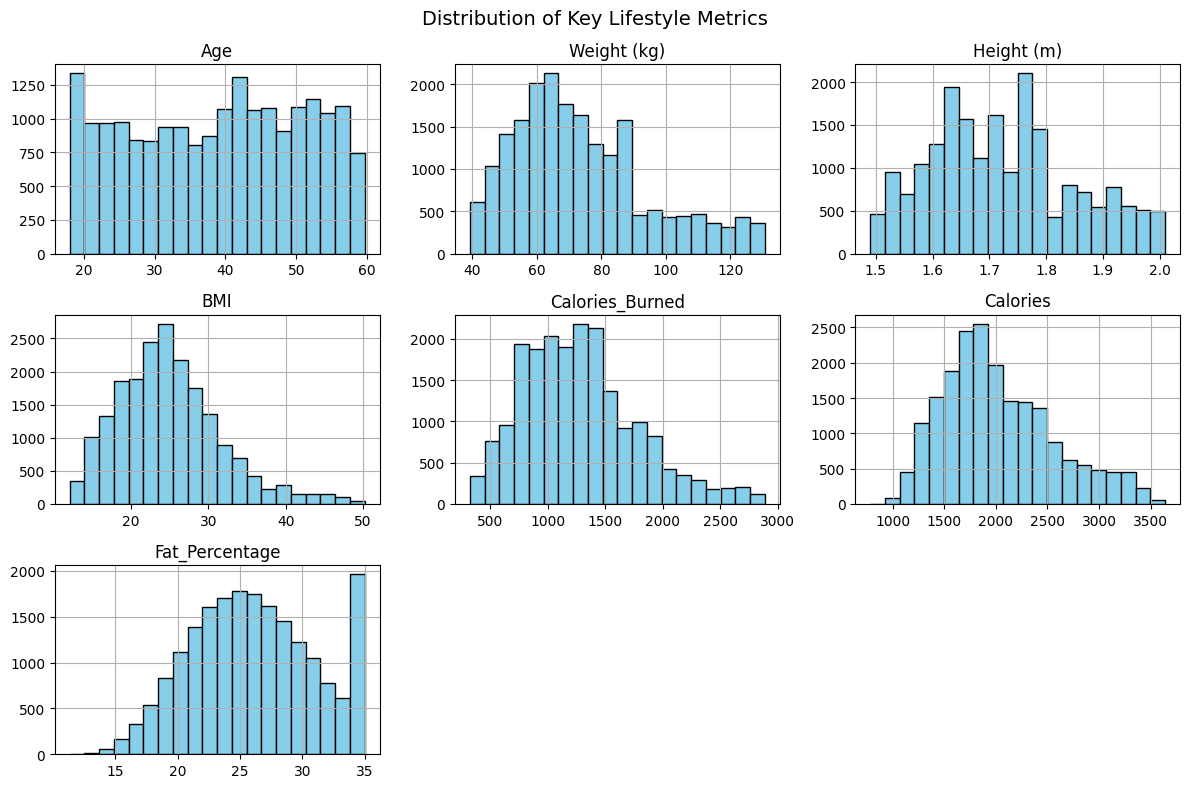

In [15]:
num_features = ['Age', 'Weight (kg)', 'Height (m)', 'BMI', 
                'Calories_Burned', 'Calories', 'Fat_Percentage']
df[num_features].hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Key Lifestyle Metrics', fontsize=14)
plt.tight_layout()
plt.show()

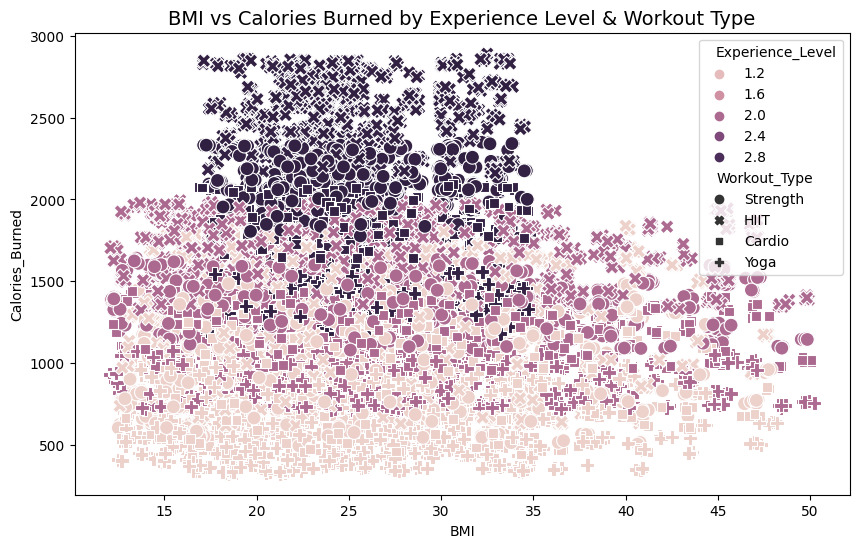

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='BMI', y='Calories_Burned', hue='Experience_Level', style='Workout_Type', s=100)
plt.title('BMI vs Calories Burned by Experience Level & Workout Type', fontsize=14)
plt.show()


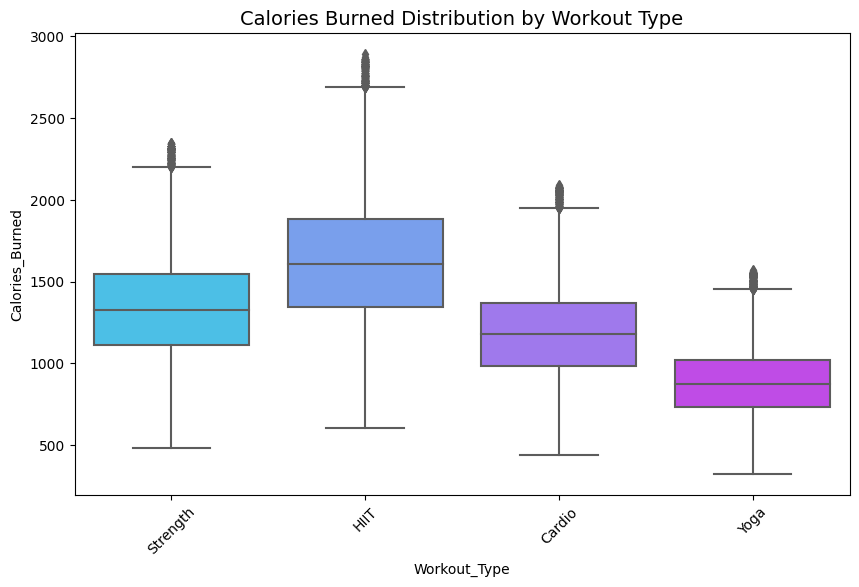

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Workout_Type', y='Calories_Burned', palette='cool')
plt.title('Calories Burned Distribution by Workout Type', fontsize=14)
plt.xticks(rotation=45)
plt.show()

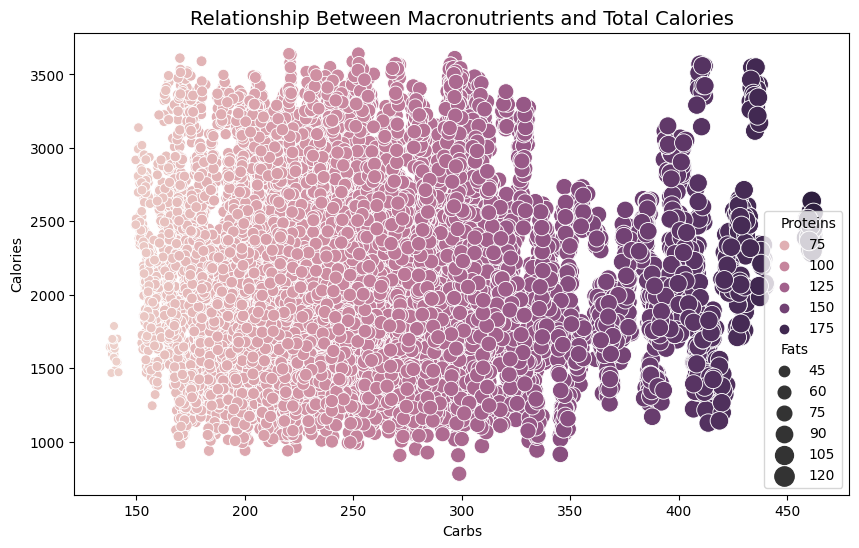

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Carbs', y='Calories', hue='Proteins', size='Fats', sizes=(40, 200))
plt.title('Relationship Between Macronutrients and Total Calories', fontsize=14)
plt.show()

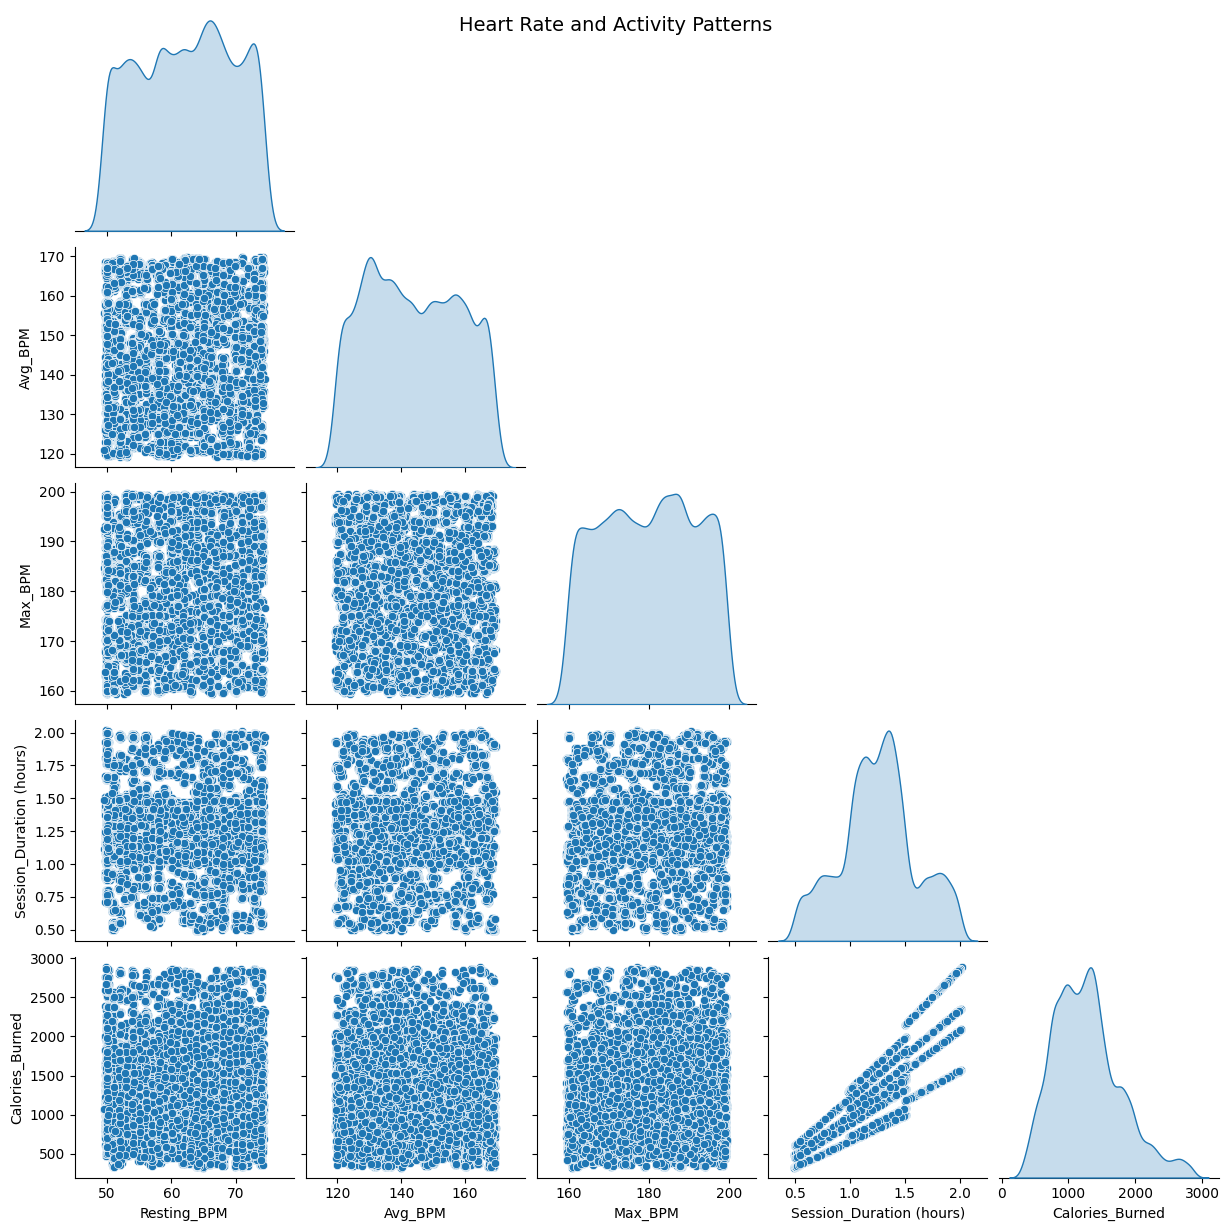

In [19]:
sns.pairplot(df[['Resting_BPM', 'Avg_BPM', 'Max_BPM', 'Session_Duration (hours)', 'Calories_Burned']], 
             diag_kind='kde', corner=True)
plt.suptitle('Heart Rate and Activity Patterns', fontsize=14)
plt.show()

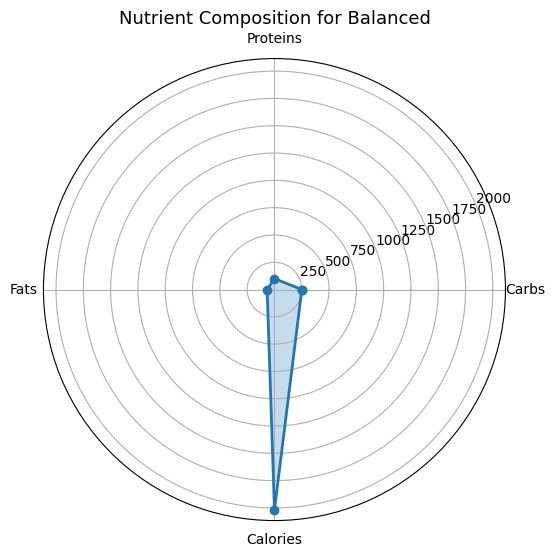

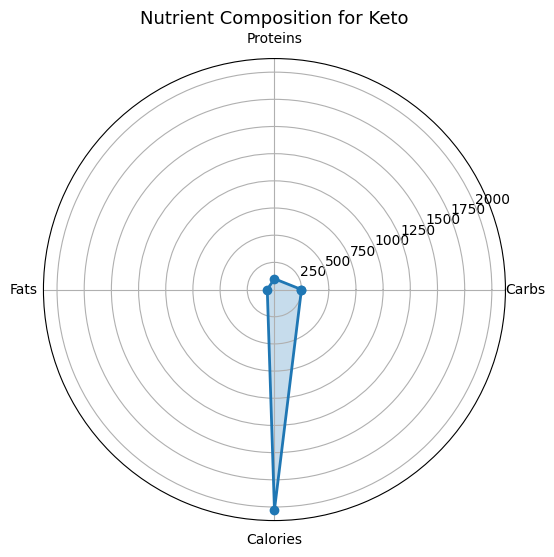

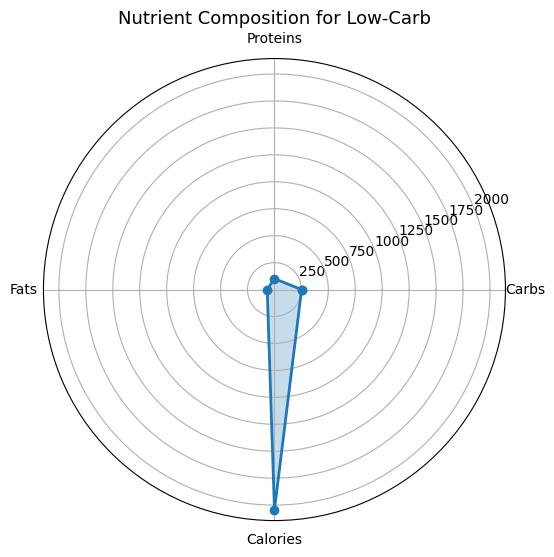

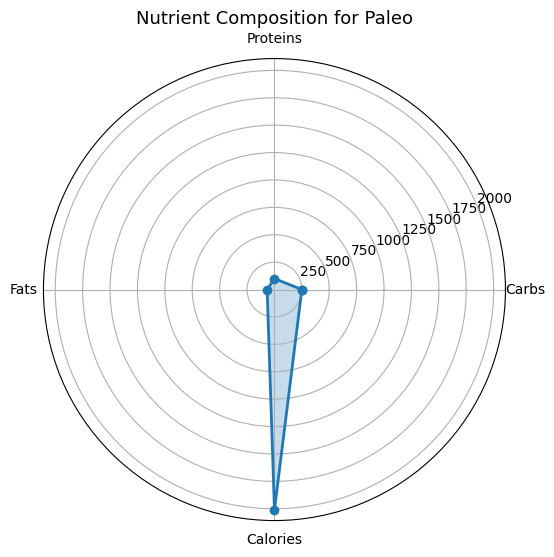

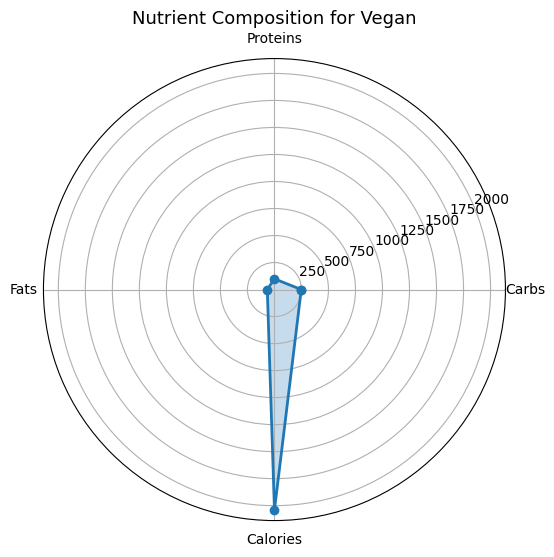

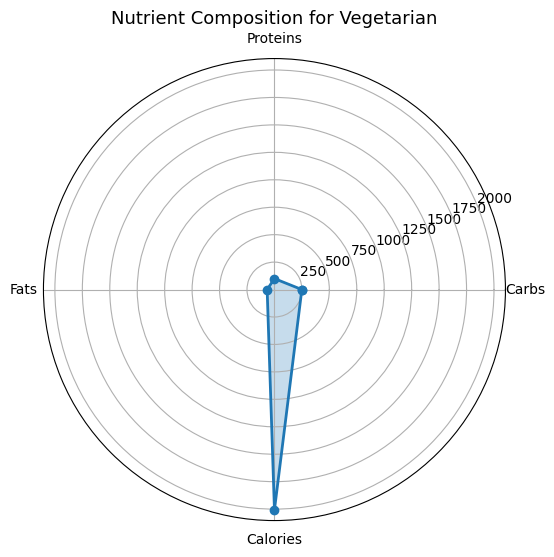

In [20]:
categories = ['Carbs', 'Proteins', 'Fats', 'Calories']
diet_avg = df.groupby('diet_type')[categories].mean()

for diet in diet_avg.index:
    values = diet_avg.loc[diet].values.flatten().tolist()
    values += values[:1]  # close the loop
    angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
    angles += angles[:1]
    
    plt.figure(figsize=(6, 6))
    plt.polar(angles, values, marker='o', linewidth=2)
    plt.fill(angles, values, alpha=0.25)
    plt.title(f'Nutrient Composition for {diet}', size=13)
    plt.xticks(angles[:-1], categories)
    plt.show()

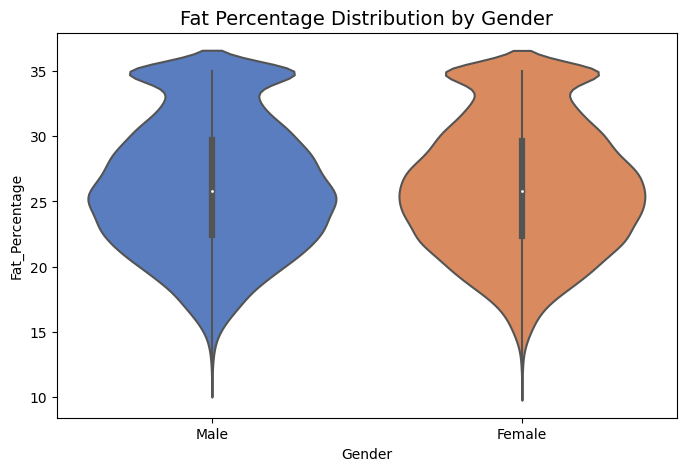

In [21]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='Gender', y='Fat_Percentage', palette='muted')
plt.title('Fat Percentage Distribution by Gender', fontsize=14)
plt.show()

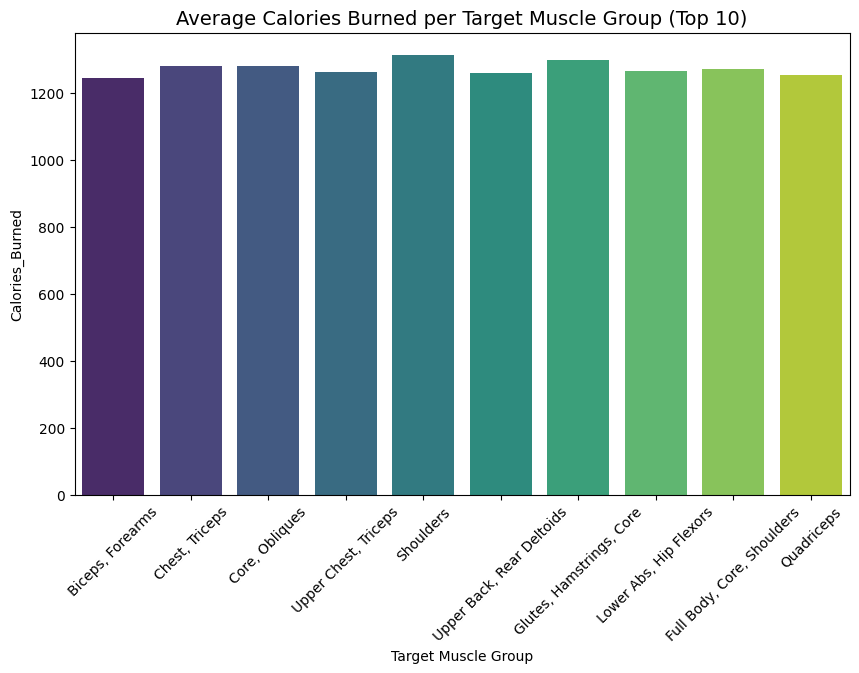

In [22]:
top_muscles = df['Target Muscle Group'].value_counts().nlargest(10).index
plt.figure(figsize=(10, 6))
sns.barplot(data=df[df['Target Muscle Group'].isin(top_muscles)], 
            x='Target Muscle Group', y='Calories_Burned', ci=None, palette='viridis')
plt.title('Average Calories Burned per Target Muscle Group (Top 10)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

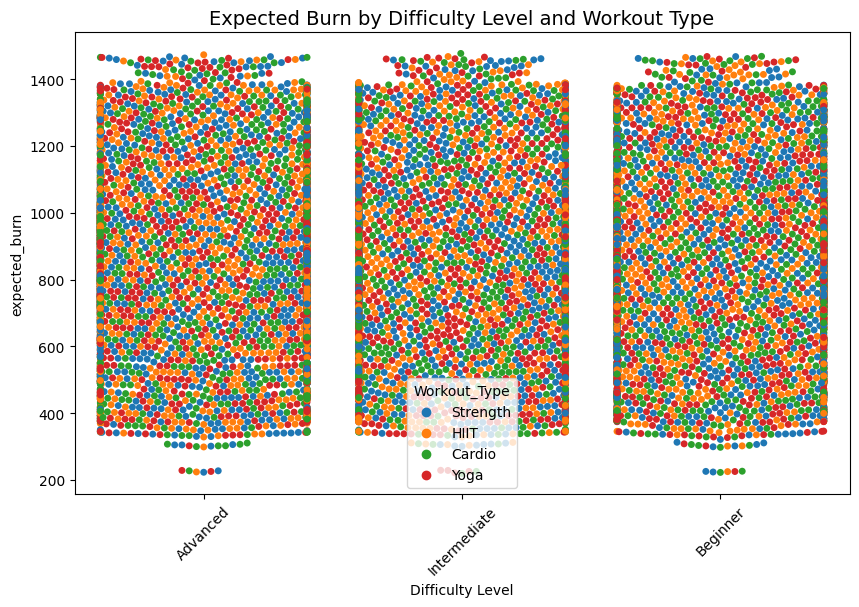

In [23]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x='Difficulty Level', y='expected_burn', hue='Workout_Type', palette='tab10')
plt.title('Expected Burn by Difficulty Level and Workout Type', fontsize=14)
plt.xticks(rotation=45)
plt.show()

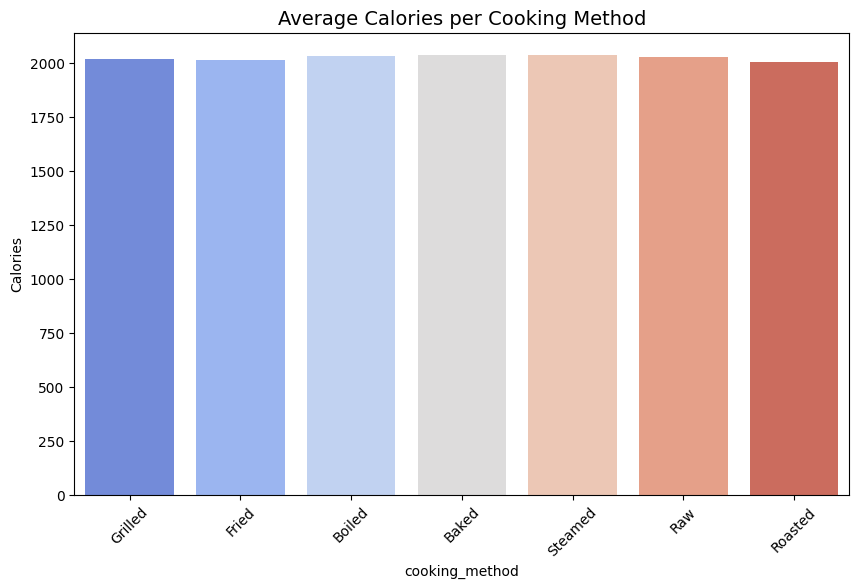

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='cooking_method', y='Calories', ci=None, palette='coolwarm')
plt.title('Average Calories per Cooking Method', fontsize=14)
plt.xticks(rotation=45)
plt.show()

## ML Algorithms

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [26]:
df.fillna(df.mode().iloc[0], inplace=True)

In [27]:
label = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label.fit_transform(df[col])

In [28]:
X = df.drop('Burns_Calories_Bin', axis=1)
y = df['Burns_Calories_Bin']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}

In [31]:
accuracy_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds) * 100
    accuracy_results[name] = acc
    print(f"{name} Accuracy: {acc:.2f}%")

Logistic Regression Accuracy: 25.95%
Decision Tree Accuracy: 100.00%
Random Forest Accuracy: 100.00%
Gradient Boosting Accuracy: 100.00%
KNN Accuracy: 100.00%
SVM Accuracy: 99.48%


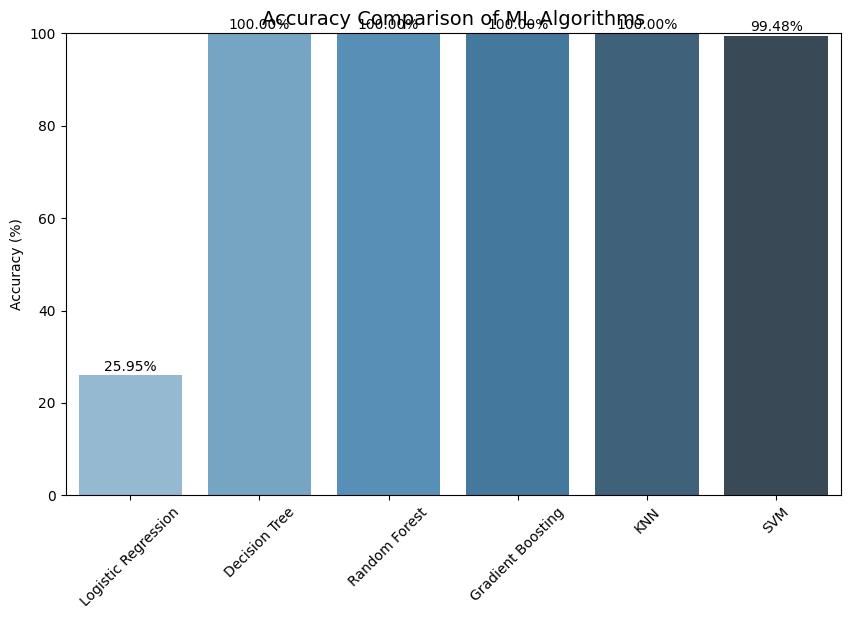

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_results.keys()), y=list(accuracy_results.values()), palette="Blues_d")
plt.title("Accuracy Comparison of ML Algorithms", fontsize=14)
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=45)
plt.ylim(0, 100)
for i, v in enumerate(accuracy_results.values()):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontsize=10, color='black')
plt.show()

In [33]:
best_model = max(accuracy_results, key=accuracy_results.get)
print(f"\n🏆 Best Performing Model: {best_model} with {accuracy_results[best_model]:.2f}% accuracy")


🏆 Best Performing Model: Decision Tree with 100.00% accuracy


## Thank you...pls upvote!!!